In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/novozymes-enzyme-stability-prediction/sample_submission.csv
/kaggle/input/novozymes-enzyme-stability-prediction/wildtype_structure_prediction_af2.pdb
/kaggle/input/novozymes-enzyme-stability-prediction/train.csv
/kaggle/input/novozymes-enzyme-stability-prediction/test.csv
/kaggle/input/novozymes-enzyme-stability-prediction/train_updates_20220929.csv


In [3]:
traindata=pd.read_csv('/kaggle/input/novozymes-enzyme-stability-prediction/train.csv')


In [4]:
testdata=pd.read_csv('/kaggle/input/novozymes-enzyme-stability-prediction/test.csv')

In [5]:
traindata_update=pd.read_csv('/kaggle/input/novozymes-enzyme-stability-prediction/train_updates_20220929.csv')

In [6]:
testdata

,seq_id,protein_sequence,pH,data_source
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,Novozymes
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
...,...,...,...,...
2408,33798,VPVNPEPDATSVENVILKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2409,33799,VPVNPEPDATSVENVLLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2410,33800,VPVNPEPDATSVENVNLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2411,33801,VPVNPEPDATSVENVPLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes


In [7]:
traindata_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2434 entries, 0 to 2433
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seq_id            2434 non-null   int64  
 1   protein_sequence  25 non-null     object 
 2   pH                25 non-null     float64
 3   data_source       0 non-null      float64
 4   tm                25 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 95.2+ KB


In [8]:
traindata.head()

,seq_id,protein_sequence,pH,data_source,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5


In [9]:
traindata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31390 entries, 0 to 31389
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seq_id            31390 non-null  int64  
 1   protein_sequence  31390 non-null  object 
 2   pH                31104 non-null  float64
 3   data_source       28043 non-null  object 
 4   tm                31390 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [10]:
traindata.describe()

,seq_id,pH,tm
count,31390.000000,31104.000000,31390.000000
mean,15694.500000,6.892339,49.147337
std,9061.656811,1.612225,14.010089
min,0.000000,1.990000,-1.000000
25%,7847.250000,7.000000,42.100000
50%,15694.500000,7.000000,48.000000
75%,23541.750000,7.000000,53.800000
max,31389.000000,64.900000,130.000000


In [11]:
traindata.corr()

,seq_id,pH,tm
seq_id,1.000000,-0.040164,0.008750
pH,-0.040164,1.000000,-0.044544
tm,0.008750,-0.044544,1.000000


In [12]:
traindata.columns

Index(['seq_id', 'protein_sequence', 'pH', 'data_source', 'tm'], dtype='object')

#From above analysis we can find that there is no need of data_source from corelation and statistical description.
#So we are removing it 

In [13]:
traindata.head()


,seq_id,protein_sequence,pH,data_source,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5


In [14]:
traindata.drop(['data_source'],axis=1,inplace=True)
traindata

,seq_id,protein_sequence,pH,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,49.5
...,...,...,...,...
31385,31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,51.8
31386,31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,37.2
31387,31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,64.6
31388,31388,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.0,50.7


In [15]:
traindata.isnull().sum()

seq_id                0
protein_sequence      0
pH                  286
tm                    0
dtype: int64

#calculate null value present in training dataset.

In [16]:
traindata['pH'] = traindata['pH'].fillna(traindata['pH'].mean())

Text(0.5, 1.0, 'Heatmap for correlation between columns of training data')

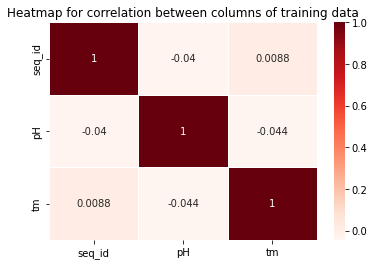

In [17]:
sns.heatmap(traindata.corr(),linewidths=1,cmap=plt.cm.Reds, annot=True);

plt.title('Heatmap for correlation between columns of training data')

#checking the heatmap between the training data

In [18]:
import re

In [19]:
search ="A"

#To make things easier here details of all amino acids are listed in search_amino.

In [20]:
search_amino=['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
for amino_acid in search_amino:
     traindata[amino_acid]=traindata['protein_sequence'].str.count(amino_acid,re.I)

In [21]:
traindata.drop(['protein_sequence'],axis=1,inplace=True)
traindata

,seq_id,pH,tm,A,C,D,E,F,G,H,...,M,N,P,Q,R,S,T,V,W,Y
0,0,7.0,75.7,45,1,13,30,13,38,3,...,8,5,18,6,25,11,14,37,4,3
1,1,7.0,50.5,28,0,10,52,6,18,4,...,2,6,8,22,30,14,12,13,3,3
2,2,7.0,40.5,50,9,27,32,21,65,11,...,6,15,20,25,31,33,30,30,3,16
3,3,7.0,47.2,20,5,19,29,12,16,7,...,2,9,16,9,10,16,19,14,3,4
4,4,7.0,49.5,86,14,78,78,32,84,40,...,31,65,128,54,63,148,120,124,16,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31385,31385,7.0,51.8,33,12,38,31,18,51,15,...,13,24,25,24,42,33,18,42,13,18
31386,31386,7.0,37.2,37,5,21,29,22,27,22,...,14,19,19,16,25,37,26,34,5,14
31387,31387,7.0,64.6,13,1,7,7,7,11,2,...,7,5,6,8,3,10,6,7,4,4
31388,31388,7.0,50.7,47,5,34,36,23,52,11,...,26,25,31,12,25,51,32,48,3,18


In [22]:
# from sklearn.impute import SimpleImputer
# my_imputer_data = SimpleImputer()
# data_with_imputed_values_data = my_imputer_data.fit_transform(traindata)

In [23]:
testdata.describe()

,seq_id,pH
count,2413.000000,2413.0
mean,32596.000000,8.0
std,696.717422,0.0
min,31390.000000,8.0
25%,31993.000000,8.0
50%,32596.000000,8.0
75%,33199.000000,8.0
max,33802.000000,8.0


In [24]:
search_amino=['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
for amino in search_amino:
    testdata[amino]=testdata['protein_sequence'].str.count(amino,re.I)

In [25]:
testdata.drop(['data_source','protein_sequence'],axis=1,inplace=True)
testdata.head()

,seq_id,pH,A,C,D,E,F,G,H,I,...,M,N,P,Q,R,S,T,V,W,Y
0,31390,8,22,4,15,8,10,19,0,6,...,0,19,17,13,3,18,8,13,6,6
1,31391,8,22,4,15,7,10,19,0,6,...,0,19,17,13,3,18,8,13,6,6
2,31392,8,22,4,15,7,10,19,0,6,...,0,19,17,13,3,18,8,13,6,6
3,31393,8,22,5,15,7,10,19,0,6,...,0,19,17,13,3,18,8,13,6,6
4,31394,8,22,4,15,7,11,19,0,6,...,0,19,17,13,3,18,8,13,6,6


#Data Visualization of training data

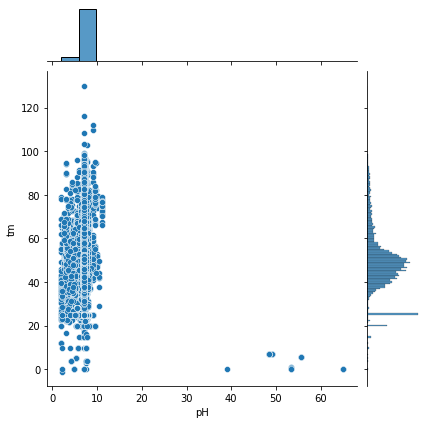

In [26]:
sns.jointplot(data=traindata, x="pH", y="tm")

In [27]:
traindata['pH'].value_counts()

7.000000     26462
7.500000       576
8.000000       502
3.000000       288
6.892339       286
             ...  
3.140000         1
2.530000         1
2.810000         1
39.000000        1
10.300000        1
Name: pH, Length: 116, dtype: int64

In [28]:
# traindata = traindata.drop("data_source",axis = 1)


In [29]:
traindata['tm'].value_counts()

25.0     1472
20.0      561
50.0      200
45.0      178
49.7      176
         ... 
98.1        1
97.6        1
92.7        1
1.2         1
103.0       1
Name: tm, Length: 770, dtype: int64

In [30]:
x=traindata.drop('tm',axis = 1)
y=traindata['tm']

In [31]:
x

,seq_id,pH,A,C,D,E,F,G,H,I,...,M,N,P,Q,R,S,T,V,W,Y
0,0,7.0,45,1,13,30,13,38,3,14,...,8,5,18,6,25,11,14,37,4,3
1,1,7.0,28,0,10,52,6,18,4,13,...,2,6,8,22,30,14,12,13,3,3
2,2,7.0,50,9,27,32,21,65,11,16,...,6,15,20,25,31,33,30,30,3,16
3,3,7.0,20,5,19,29,12,16,7,10,...,2,9,16,9,10,16,19,14,3,4
4,4,7.0,86,14,78,78,32,84,40,71,...,31,65,128,54,63,148,120,124,16,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31385,31385,7.0,33,12,38,31,18,51,15,21,...,13,24,25,24,42,33,18,42,13,18
31386,31386,7.0,37,5,21,29,22,27,22,30,...,14,19,19,16,25,37,26,34,5,14
31387,31387,7.0,13,1,7,7,7,11,2,6,...,7,5,6,8,3,10,6,7,4,4
31388,31388,7.0,47,5,34,36,23,52,11,34,...,26,25,31,12,25,51,32,48,3,18


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_valid,y_train,y_valid=train_test_split(x , y,test_size=0.20,random_state=69)

In [34]:
x_train

,seq_id,pH,A,C,D,E,F,G,H,I,...,M,N,P,Q,R,S,T,V,W,Y
29924,29924,7.0,92,0,15,44,9,40,3,2,...,2,5,15,24,41,9,3,22,7,16
30875,30875,7.0,24,16,29,37,37,27,21,40,...,8,48,21,32,15,64,40,20,4,11
21600,21600,7.0,31,6,20,23,9,69,3,11,...,8,12,30,22,39,36,15,20,4,3
15870,15870,6.0,14,3,6,12,2,14,6,7,...,4,7,5,8,10,4,10,9,6,5
20487,20487,7.0,26,3,12,26,8,29,7,20,...,11,11,13,8,11,15,13,29,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25015,25015,7.0,55,5,25,32,13,48,9,31,...,14,16,14,9,27,20,19,35,2,9
9818,9818,7.0,39,0,7,20,6,27,2,6,...,4,6,14,6,21,7,7,26,2,4
27243,27243,7.0,35,4,15,15,7,34,5,30,...,9,11,6,21,18,21,14,21,1,7
4041,4041,7.0,116,19,148,168,60,111,48,84,...,40,66,95,86,120,136,81,97,17,74


In [35]:
x_train.shape,y_train.shape

((25112, 22), (25112,))

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

In [38]:
randomf = RandomForestRegressor()

In [39]:
from pprint import pprint

pprint(randomf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [40]:
from scipy.stats import randint

random_grid={'max_depth':list(np.arange(10, 100, step=10)),
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,9),
              'min_samples_leaf':randint(1,3),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [41]:
pprint(random_grid)

{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90],
 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2efb968450>,
 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2efec89b90>,
 'min_samples_split': array([2, 4, 6, 8]),
 'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460])}


In [42]:
# Use the random grid to search for best hyperparameters
#create the base model to tune
randomf = RandomForestRegressor(random_state = 69)
# Random search of parameters, using 3 fold cross validation, 
randomf_random = RandomizedSearchCV(estimator=randomf, param_distributions=random_grid,
                              n_iter = 50, scoring='neg_mean_absolute_error', 
                              cv =3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
randomf_random.fit(x_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=69),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2efb968450>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2efec89b90>,
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460])},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=2)

In [43]:
y_predict= randomf_random.predict(x_valid)
y_predict.shape

(6278,)

In [44]:
testdata.shape

(2413, 22)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tm', ylabel='Density'>

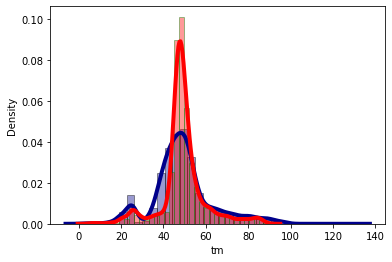

In [45]:
# Density Plot and Histogram of all arrival delays
sns.distplot(y_valid, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
# Density Plot and Histogram of all arrival delays
sns.distplot(y_predict, hist=True, kde=True, 
             bins=int(180/5), color = 'red', 
             hist_kws={'edgecolor':'green'},
             kde_kws={'linewidth': 4})

In [46]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_predict)))

Mean Absolute Error: 6.3114195065943
Mean Squared Error: 81.98905090694565
Root Mean Squared Error: 9.054780555427373


In [47]:
from scipy.stats import spearmanr

In [48]:
from scipy import stats

stats.spearmanr(y_valid, y_predict)

SpearmanrResult(correlation=0.5865643513296231, pvalue=0.0)

In [49]:
submissionfile=pd.DataFrame()

In [50]:
submissionfile.head()

""


In [51]:
submissionfile['seq_id']=testdata['seq_id']

In [52]:
submissionfile['tm'] =randomf_random.predict(testdata)

In [53]:
submissionfile.to_csv('submission.csv',index=False)

In [54]:
submissionfile

,seq_id,tm
0,31390,46.201353
1,31391,47.303865
2,31392,46.212345
3,31393,49.367841
4,31394,49.532414
...,...,...
2408,33798,46.614226
2409,33799,46.918925
2410,33800,46.802306
2411,33801,47.163734


In [55]:
from IPython.display import FileLink


In [56]:
FileLink('submission.csv')

/kaggle/working/submission.csv